In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def convolution(nd_array, kernel):
    # Do without padding
    n = len(nd_array)
    k = len(kernel)
    
    # Calculate the size of the result
    result = []
    result_size = n-k+1
    for i in range(result_size):
        row = []
        for j in range(result_size):
            cropped = nd_array[i:i+k, j:j+k]
            # Do the calculation, sum up all the elements
            row.append((cropped*kernel).sum())
        result.append(row)
    return np.array(result)

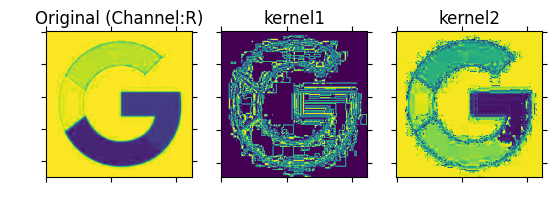

In [3]:
# Loading the image
im = Image.open("google.png")
rgb = np.array(im.convert("RGB")) 
r=rgb[:,:,0]

# Construct the two kernels
kernel1 = np.array([[-1]*3, [-1, 8, -1], [-1]*3])
kernel2 = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]])

# Calculate and output the results
result1 = convolution(r, kernel1)
result2 = convolution(r, kernel2)
fig = plt.figure()

# The original figure, red channel
ax = fig.add_subplot(1, 3, 1)
ax.imshow(Image.fromarray(np.uint8(r)))
ax.set_title("Original (Channel:R)")
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# Convolved with kernel1
ax = fig.add_subplot(1, 3, 2)
ax.imshow(Image.fromarray(np.uint8(result1)))
ax.set_title("kernel1")
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# Convolved with kernel2
ax = fig.add_subplot(1, 3, 3)
ax.imshow(Image.fromarray(np.uint8(result2)))
ax.set_title("kernel2")
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.show()